In [50]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [51]:
conn = sqlite3.connect("/Users/bohdan_lysachenko/PycharmProjects/py-restaurant-data-analysis/db.sqlite3")

query = """
SELECT o.id, o.datetime, oi.quantity, oi.order_id, oi.product_id, p.price, p.name
FROM restaurant_order o
INNER JOIN restaurant_orderitem oi ON o.id = oi.order_id
INNER JOIN restaurant_product p ON oi.product_id = p.id;
"""

df = pd.read_sql_query(query, conn)

df.to_csv('combined_data.csv', index=False)

conn.close()

df = pd.read_csv('combined_data.csv')
df.shape[0]

74818

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

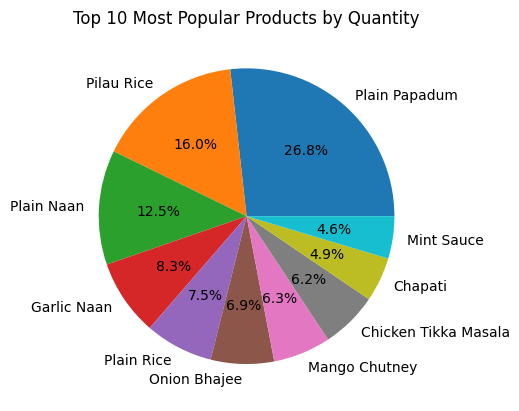

In [52]:
product_counts = df.groupby('name')['quantity'].sum()

top_10 = product_counts.sort_values(ascending=False).head(10)

percentages = (top_10 / top_10.sum()) * 100

plt.pie(percentages, labels=top_10.index, autopct='%1.1f%%')
plt.title('Top 10 Most Popular Products by Quantity')
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

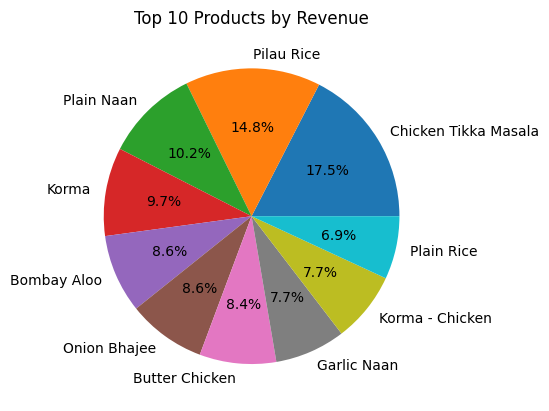

In [53]:
df['item_price'] = df['price'] * df['quantity']

product_revenue = df.groupby('product_id')['item_price'].sum().reset_index()

product_revenue = pd.merge(product_revenue, df[['product_id', 'name']], on='product_id').drop_duplicates()

top_products = product_revenue.sort_values(by='item_price', ascending=False).head(10)

top_products['revenue_pct'] = (top_products['item_price'] / top_products['item_price'].sum()) * 100

plt.pie(top_products['revenue_pct'], labels=top_products['name'], autopct='%1.1f%%')
plt.title('Top 10 Products by Revenue')
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

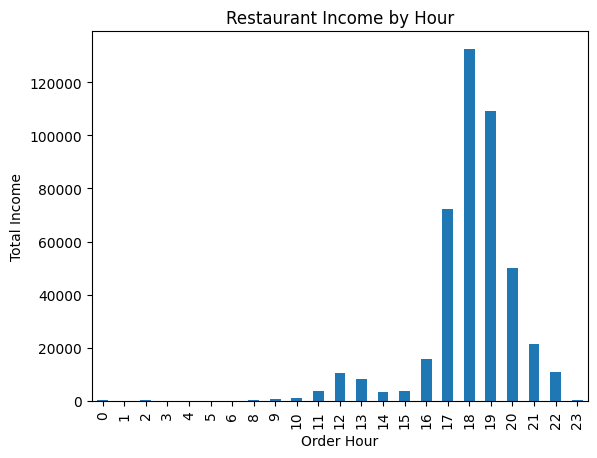

In [54]:

df['datetime'] = pd.to_datetime(df['datetime'])
df['order_hour'] = df['datetime'].dt.hour
hourly_income = df.groupby('order_hour')['item_price'].sum()

hourly_income.plot(kind='bar', x='order_hour', y='total_income')
hourly_income_filtered = hourly_income[hourly_income != 0]

hourly_income_filtered.plot(kind='bar', x='order_hour', y='total_income')
plt.xlabel('Order Hour')
plt.ylabel('Total Income')
plt.title('Restaurant Income by Hour')
plt.show()



# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

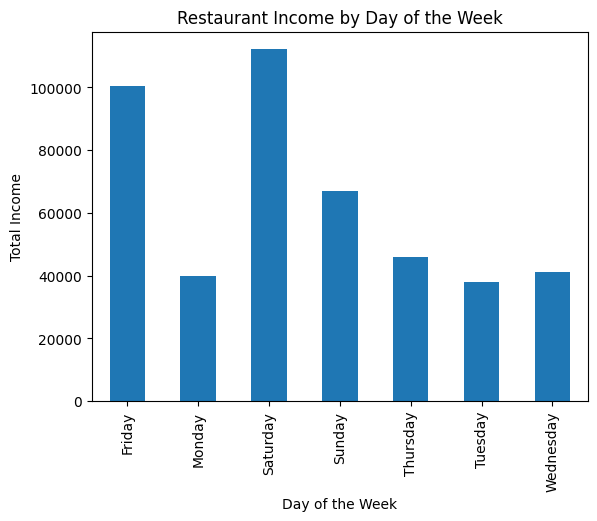

In [55]:
df['day_of_week'] = df['datetime'].dt.day_name()

# Calculate total income by day of the week
daily_income = df.groupby('day_of_week')['item_price'].sum()

# Create bar chart
daily_income.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Total Income')
plt.title('Restaurant Income by Day of the Week')
plt.show()